In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, MiniBatchKMeans, AgglomerativeClustering
from sklearn.datasets import make_circles, make_moons, make_blobs, load_iris
from sklearn.metrics.cluster import homogeneity_score as hmg_score

Datasets initialization.

In this test we will use such generated datasets as circles, moons and blobs as well as default iris dataset.

In [91]:
circles = make_circles(400, noise=0.02, factor=0.75)
moons = make_moons(300, noise=0.02)
blobs = make_blobs(200)
iris = load_iris(return_X_y=True)

datasets = {
    'Circles': circles,
    'Moons': moons,
    'Blobs': blobs,
    'Iris': iris,
}

For this test were selected such clusterizers as:
- MiniBatchKMeans
- DBSCAN
- AgglomerativeClustering

In [92]:
# None is just a flag to put an original data into final visualization.
clusterizers = [
    [None, MiniBatchKMeans(n_clusters=2), DBSCAN(eps=0.12), AgglomerativeClustering(n_clusters=2, linkage='single')],
    [None, MiniBatchKMeans(n_clusters=2), DBSCAN(eps=0.3), AgglomerativeClustering(n_clusters=2, linkage='single')],
    [None, MiniBatchKMeans(n_clusters=3), DBSCAN(eps=1), AgglomerativeClustering(n_clusters=3)],
    [None, MiniBatchKMeans(n_clusters=3), DBSCAN(eps=0.3), AgglomerativeClustering(n_clusters=3)],
]

For every clasterizer mentioned before:
- fit using dataset X
- predict labels
- visualize predicted labels as well as original labels to compare

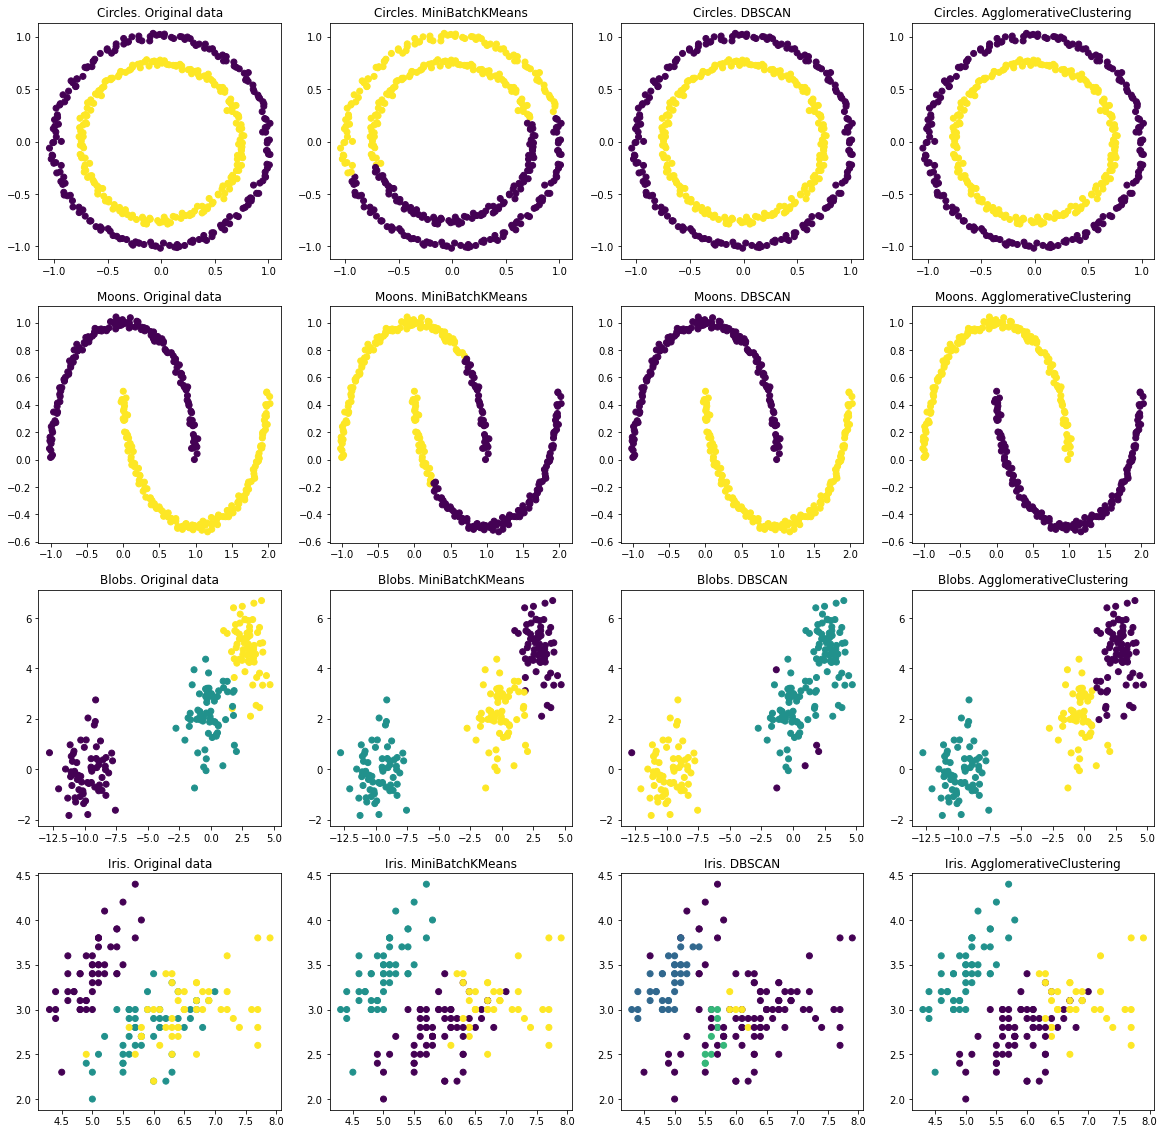

In [93]:
fig, axs = plt.subplots(len(datasets), len(clusterizers[0]), figsize=(20, 20))
for i, zip_item in enumerate(zip(datasets.items(), clusterizers)):
    dataset_item, dataset_clusterizers = zip_item
    dataset_name, dataset = dataset_item
    X, y = dataset
    for j, clasterizer in enumerate(dataset_clusterizers):
        if clasterizer:
            labels = clasterizer.fit_predict(X)
            clasterizer_name = clasterizer.__class__.__name__
        else:
            labels, clasterizer_name = y, 'Original data'
        # Number of clusters in labels, ignoring noise if present.
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        axs[i, j].scatter(x=X[:, 0], y=X[:, 1], c=labels.astype(np.float))
        axs[i, j].set_title(f'{dataset_name}. {clasterizer_name}')


Homogeneity scores for classifiers used in this test are provided below.

A particular score is a value between 0.0 and 1.0. 1.0 stands for perfectly homogeneous labeling.

In [94]:
clasterizer_names = [clasterizer.__class__.__name__ for clasterizer in clusterizers[0] if clasterizer]
homogeneity_df = pd.DataFrame(columns=['Dataset'] + clasterizer_names)
for i, zip_item in enumerate(zip(datasets.items(), clusterizers)):
        dataset_item, dataset_clusterizers = zip_item
        dataset_name, dataset = dataset_item
        _, labels_true= dataset
        scores = [hmg_score(labels_true, clasterizer.labels_) for clasterizer in dataset_clusterizers if clasterizer]
        homogeneity_df.loc[i] = [dataset_name] + scores

homogeneity_df

,Dataset,MiniBatchKMeans,DBSCAN,AgglomerativeClustering
0,Circles,0.000018,1.000000,1.000000
1,Moons,0.188990,1.000000,1.000000
2,Blobs,0.952761,0.584176,0.874751
3,Iris,0.751485,0.407655,0.760801
